In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', "0")
df['TotalCharges'] = df['TotalCharges'].astype(float)

replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


checking for null values

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


checking for any duplicates

In [9]:
df.duplicated().sum()

0

checking if any duplicate value in customer ID

In [10]:
df['customerID'].duplicated().sum()

0

formatting seniorcitizen value from 0,1 to yes,no

In [11]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

plotting customers by churn on bar chart

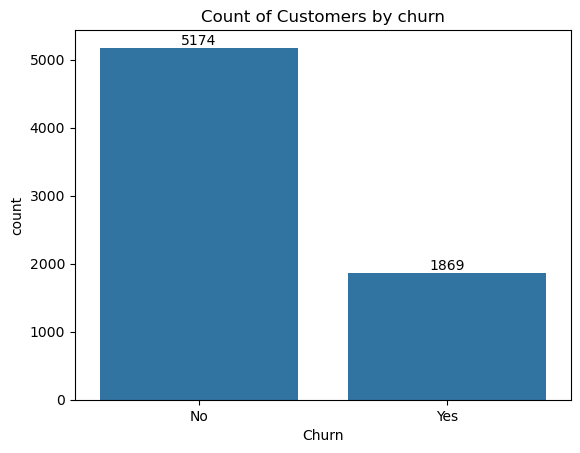

In [12]:
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by churn")
plt.show()

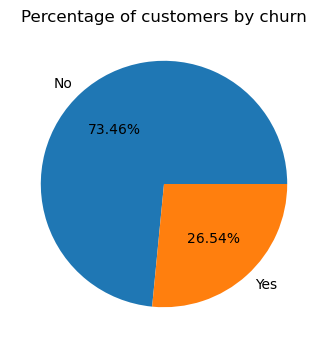

In [13]:
plt.figure(figsize=(4,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.title("Percentage of customers by churn")
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%')
plt.show()

from the pie chart we can conclude that 26.54% of customers have churned out

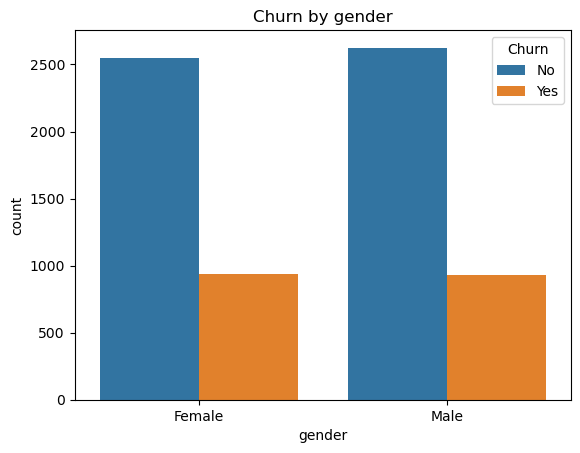

In [14]:
sns.countplot(x='gender', data=df,hue = 'Churn')
plt.title("Churn by gender")
plt.show()

churn is not based on the basis of gender as similar number of male and female customers have churned

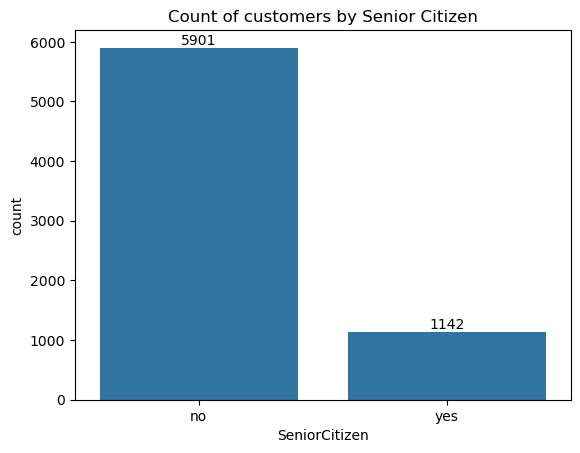

In [15]:
ax = sns.countplot(x='SeniorCitizen', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Senior Citizen")
plt.show()

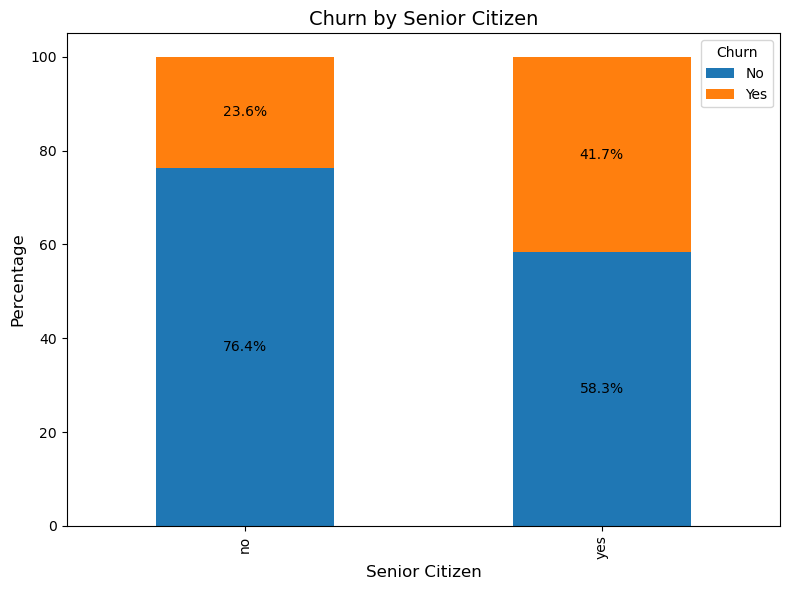

In [16]:
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate percentages for each 'Churn' category within each 'SeniorCitizen' group
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = percentages.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add percentages as labels on each bar
for i in range(len(percentages)):
    cumulative = 0  # Cumulative height of the stacked sections
    for j, value in enumerate(percentages.iloc[i]):
        if value > 0:  # Only label non-zero values
            ax.text(
                i,  # X-coordinate: bar index
                cumulative + (value / 2),  # Y-coordinate: center of the current section
                f"{value:.1f}%",  # Format as percentage
                ha='center', va='center', fontsize=10
            )
            cumulative += value  # Update cumulative height for the next section

# Customize the plot
plt.title("Churn by Senior Citizen", fontsize=14)
plt.xlabel("Senior Citizen", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.legend(title="Churn", loc="upper right")
plt.tight_layout()

# Show the plot
plt.show()

Although their are a less number of senior citizens, there is comparatively a greater percentage of senior citizen who have churned

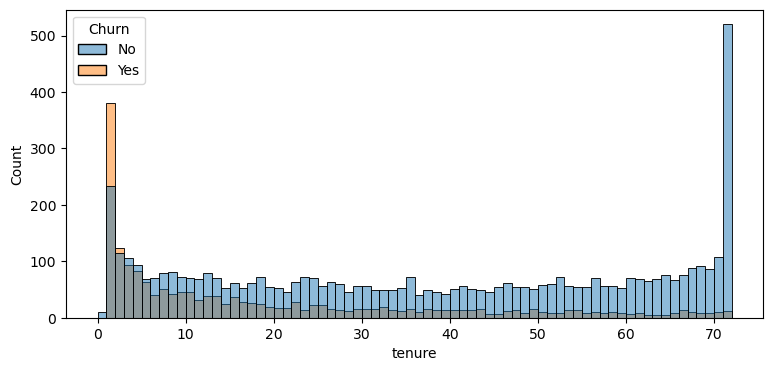

In [17]:
plt.figure(figsize=(9,4))
sns.histplot(x = 'tenure', data = df,bins=72,hue='Churn')
plt.show()

customers who have used our services for a long tenure have stayed and customers who are using our services for short tenure like 1 or 2 months have churned

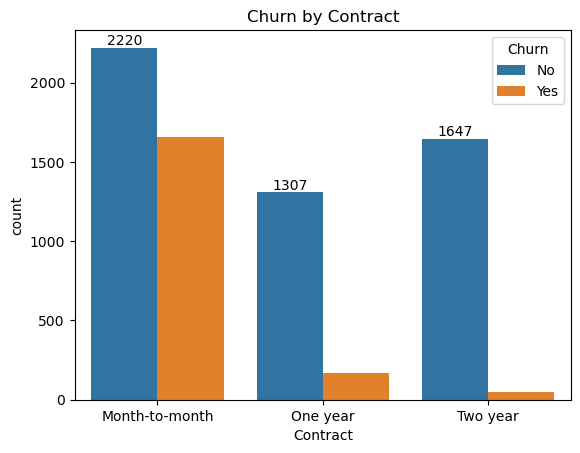

In [18]:
ax = sns.countplot(x='Contract', data=df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Contract")
plt.show()

customers who have a month-to-month to contract are more likely to churn than customers who have a one year contract or two year contract

In [20]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

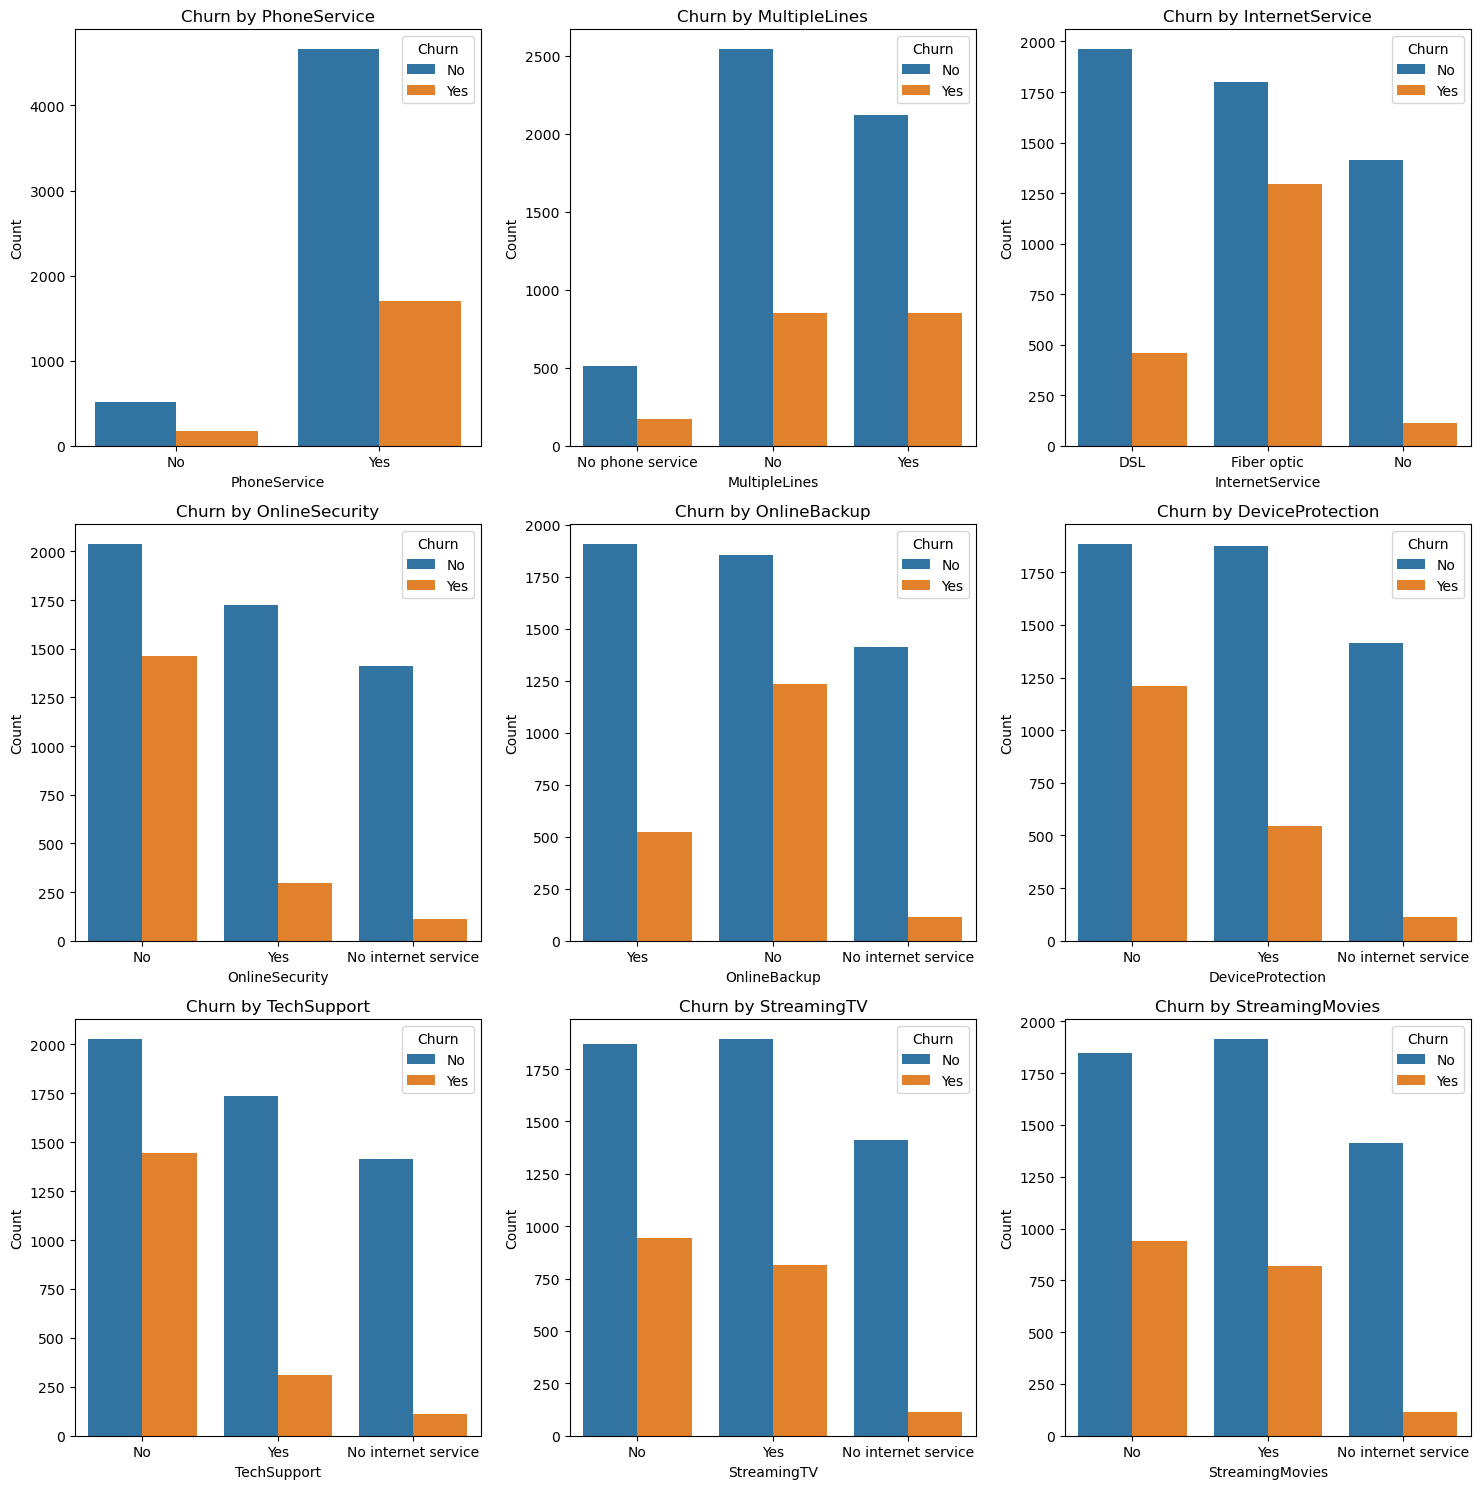

In [21]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid
num_columns = 3  # Number of plots per row
num_rows = (len(columns) + num_columns - 1) // num_columns  # Calculate rows needed
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten axes for easier indexing
axes = axes.flatten()

# Create countplots for each column
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i],hue = 'Churn')
    axes[i].set_title(f"Churn by {column}", fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)

# Remove unused subplots if columns < total grid slots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

The majority of customers who do not churn tend to have services like Phone Service, Internet Service(particularly DSL) and Online Security enabled. For services like Online Backup,
Device Protection,TechSupport, StreamingTv and Streaming Movies , churn rates are noticeably higher when these services are not used.

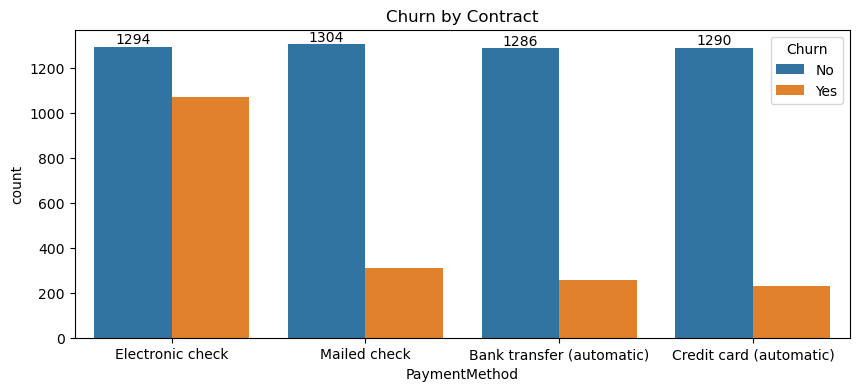

In [22]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='PaymentMethod', data=df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Contract")
plt.show()

Customers using Electronic Check as a Payment Method are more likely to churn